In [69]:
import pandas as pd
import os
import matplotlib.pylab as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from pathlib import Path
from datetime import datetime


In [2]:
data = Path(os.getcwd())
print(data)

/home/aforde/capp30254/capp30254/TheJCElles/data


In [37]:
# Loading in the tweet data
tweets = pd.read_csv(data.joinpath("covid19_tweets.csv"))

In [52]:
# Removing unnecessary columns
tweets = tweets.filter(["date", "text", "hashtags", "is_retweet"])

# Change date times to dates
tweets["date"] = pd.to_datetime(tweets["date"]).dt.date
tweets.sort_values(by='date')

In [28]:
#Filtering by key word (masks in particular)

keyword = ["mask", "masks"]
num_of_tweets = []

for num, tweet in enumerate(tweets.text):
    for word in keyword:
        if word in tweet and num not in num_of_tweets:
            num_of_tweets.append(num)

print(len(num_of_tweets))
    

6234


In [23]:
# Testing VADER algorithm
test_tweets = num_of_tweets[:10]

analyzer = SentimentIntensityAnalyzer()
for sentence in test_tweets:
    vs = analyzer.polarity_scores(sentence)
    print(vs['compound'])


# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05


0.0
0.4576
0.5994
0.3612
0.0
0.2732
-0.296
-0.296
-0.625
0.6523


In [54]:
# Filtering down to tweets reference masks, mask
mask_tweets = tweets.iloc[num_of_tweets]
mask_tweets['sentiment'] = ""
mask_tweets['sentiment_val'] = ""

mask_tweets.head()

<ipython-input-54-ef300c9d2d6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask_tweets['sentiment'] = ""
<ipython-input-54-ef300c9d2d6f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask_tweets['sentiment_val'] = ""


,date,text,hashtags,is_retweet,sentiment,sentiment_val
25,2020-07-25,#Kolar\nNeed #Blood Type : B-positive\nAt : J...,"['Kolar', 'Blood', 'COVID19']",False,,
59,2020-07-25,"US #CoronaVirus: 4,249,584 cases and 148,521 d...",['CoronaVirus'],False,,
70,2020-07-25,Concealed Nation 1 Million Giveaway https://t....,NaN,False,,
140,2020-07-25,@princesscaro85 @NVGOP @marquezjesso @andyluke...,NaN,False,,
146,2020-07-25,We provided a North Devon tourist attraction w...,"['twowayradio', 'COVID19']",False,,


In [55]:

for ind, sentence in enumerate(mask_tweets['text']):
    compound = analyzer.polarity_scores(sentence)['compound']
    mask_tweets.iloc[ind, 5] = compound
    if compound >= 0.05:
        mask_tweets.iloc[ind, 4] = 'positive'
    elif compound > -0.05 and compound < 0.05:
        mask_tweets.iloc[ind, 4] = 'neutral'
    else:
        mask_tweets.iloc[ind, 4]= 'negative'


In [94]:
# Group by and Percentage Calculation for plotting
chart_data = mask_tweets.groupby(['date', 'sentiment'])['text'].count().reset_index()

chart_data['percent'] = chart_data['text'].div(chart_data.groupby(['date'])['text'].transform(lambda x: x.sum()))



,date,sentiment,text,percent
0,2020-07-24,negative,7,0.411765
1,2020-07-24,neutral,4,0.235294
2,2020-07-24,positive,6,0.352941
3,2020-07-25,negative,211,0.290234
4,2020-07-25,neutral,247,0.339752


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<function matplotlib.pyplot.show(*args, **kw)>

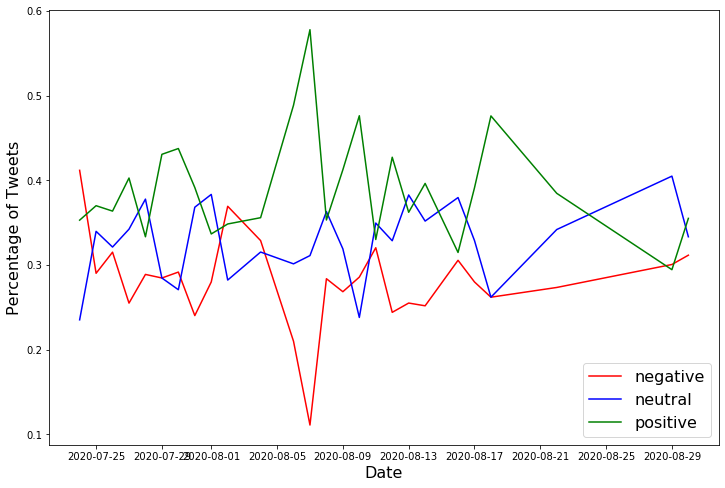

In [96]:
# Plotting
colors = colors = ['r', 'b', 'g']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
for ind, label_ in enumerate(chart_data.sentiment.unique()):
    plot_data = chart_data[chart_data['sentiment']==label_]
    plt.plot(plot_data['date'], plot_data['percent'], color = colors[ind], label = label_)

ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Percentage of Tweets", fontsize=16)
ax.legend(loc="lower right", fontsize=16)
plt.show